# 深度神经网络应用
深度学习是一种利用复杂结构的多个处理层来实现对数据进行高层次抽象的算法，是机器学习的一个重要分支。传统的BP算法仅有几层网络，需要手工指定特征且易出现局部最优问题，而深度学习引入了概率生成模型，可自动地从训练集提取特征，解决了手工特征考虑不周的问题，而且初始化了神经网络权重，采用反向传播算法进行训练，与BP算法相比取得了很好的效果。

In [1]:
import os,time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import librosa
# 用于音频数据可视化
import librosa.display

In [3]:
# 用于打乱pandas.DataFrame数据集
from sklearn.utils import shuffle
# 用于特征提取
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
src_dir = r'./dataset_city_voice'
# 子目录
sub_dir = os.path.join(src_dir, 'train_data_sub')
# 筛选后数据集
train_data_ds = os.path.join(src_dir, 'train_data_sub.csv')

In [6]:
# 同artificial_neural_networks.ipynb 构造项目文件夹结构
images_dir = os.path.join(src_dir, 'images')
if not os.path.exists(images_dir):
    os.mkdir(images_dir)

history_dir = os.path.join(src_dir, 'history')
if not os.path.exists(history_dir):
    os.mkdir(history_dir)

## 构建模型
MLP LSTM GRU CNN

### MLP
同 artificial_neural_networks.ipynb

In [7]:
def mlp(x_train, y_train, x_test, y_test,
        learning_rate=0.01, batch_size=200, epochs=100,
        loss='categorical_crossentropy', metrics=['accuracy']):
    """
    MLP多层感知机
    输入层 
    隐含层1：激活函数Relu
    隐含层2：激活函数Relu
    输出层：softmax
    :param x_train: 
    :param y_train: 
    :param x_test: 
    :param y_test: 
    :param learning_rate: 
    :param batch_size: 
    :param epochs: 
    :param loss: 
    :param metrics: 
    :return: 返回model.fit()结果
    """
    # 输入层 (样本数)
    inputs = tf.keras.Input(shape=(len(x_train[0]),))
    # print('MLP Inputs shape:',inputs.shape)
    # 隐含层1 (50个神经元)
    hidden_layer_1 = tf.keras.layers.Dense(units=50, activation='relu')(inputs)
    # 隐含层2 (50个神经元)
    hidden_layer_2 = tf.keras.layers.Dense(units=50, activation='relu')(hidden_layer_1)
    # 输出层 (10个类别)
    outputs = tf.keras.layers.Dense(units=10, activation='softmax')(hidden_layer_2)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
        loss=loss, metrics=metrics)
    history = model.fit(x=x_train, y=y_train,
                        validation_data=(x_test, y_test),
                        batch_size=batch_size, epochs=epochs, verbose=0)
    return history

### LSTM
长短时记忆
- 循环神经网络 (RNN)的一种，为了解决长期记忆和反向传播中的梯度等问题而提出来的
- 实验数据有非常明显的时间特征，各种特征提取后的特征向量都是按照时间步加以展开，因此考虑使用添加了时间信息的循环神经网络构建分类模型

In [8]:
def lstm(x_train, y_train, x_test, y_test,
         learning_rate=0.01, batch_size=300, epochs=3000,
         loss='categorical_crossentropy', metrics=['accuracy']):
    """
    长短时记忆LSTM网络
    :param x_train: 
    :param y_train: 
    :param x_test: 
    :param y_test: 
    :param learning_rate: 
    :param batch_size: 
    :param epochs: 
    :param loss: 
    :param metrics: 
    :return: 
    """
    inputs = tf.keras.Input(shape=(len(x_train[0]), len(x_train[0][0])))
    # 隐含层：激活函数 tanh
    hidden_layer = tf.keras.layers.LSTM(units=50, activation='tanh')(inputs)
    outputs = tf.keras.layers.Dense(
        units=10, activation='softmax')(hidden_layer)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    # model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate), loss=loss, metrics=metrics)
    model.compile(optimizer=tf.optimizers.Adam(
        learning_rate=learning_rate), loss=loss, metrics=metrics)
    # verbose=0为不在标准输出流输出日志信息
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                        batch_size=batch_size, epochs=epochs, verbose=0)

    return history

### GRU

In [9]:
def gru(x_train, y_train, x_test, y_test,
        learning_rate=0.01, batch_size=300, epochs=3000,
        loss='categorical_crossentropy', metrics=['accuracy']):
    """
    GRU网络
    :param x_train: 
    :param y_train: 
    :param x_test: 
    :param y_test: 
    :param learning_rate: 
    :param batch_size: 
    :param epochs: 
    :param loss: 
    :param metrics: 
    :return: 
    """
    # 输入层：时间步（样本数），特征数
    inputs = tf.keras.Input(
        shape=(len(x_train[0]), len(x_train[0][0])))
    # 隐含层：激活函数 tanh
    hidden_layer = tf.keras.layers.GRU(units=50, activation='tanh')(inputs)
    # 输出层
    outputs = tf.keras.layers.Dense(
        units=10, activation='softmax')(hidden_layer)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    # model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate), loss=loss, metrics=metrics)
    model.compile(optimizer=tf.optimizers.Adam(
        learning_rate=learning_rate), loss=loss, metrics=metrics)
    # verbose=0为不在标准输出流输出日志信息
    history = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test),
                        batch_size=batch_size, epochs=epochs, verbose=0)

    return history

### CNN
卷积神经网络
CNN网络常用于处理图像问题，在本案例中把CNN应用于特征提取后的特征矩阵上。
在CNN中，第一个卷积层有32个卷积核，每个卷积核为3×3大小；
在Relu激活之前，使用了BatchNormalization批标准化层以增大梯度，使得模型的收敛速度更快；然后连接到max-pooling池化层；
紧接着是拥有64个卷积核的卷积层与max-pooling池化层；最终通过Flatten后，通过两个全连接层得到网络的输出。

In [10]:
def cnn(x_train, y_train, x_test, y_test,
        learning_rate=0.00001, batch_size=100, epochs=100,
        loss='categorical_crossentropy', metrics=['accuracy']):
    # 输入层
    inputs = tf.keras.Input(shape=(len(x_train[0]), len(x_train[0][0]), 1))
    # part 1
    # 卷积层
    x = tf.keras.layers.Conv2D(filters=32, kernel_size=3)(inputs)
    # 规范化
    x = tf.keras.layers.BatchNormalization()(x)
    # 激活函数
    x = tf.keras.layers.Activation(activation='relu')(x)
    # 池化层
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    # dropout方法：防止过拟合
    x = tf.keras.layers.Dropout(rate=0.2)(x)

    x = tf.keras.layers.Conv2D(filters=64, kernel_size=3)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation(activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(rate=0.2)(x)
    # 展平（规范化）
    x = tf.keras.layers.Flatten()(x)

    x = tf.keras.layers.Dense(units=1024)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation(activation='relu')(x)
    # 输出层
    outputs = tf.keras.layers.Dense(units=10, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    # model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate), loss=loss, metrics=metrics)
    model.compile(optimizer=tf.optimizers.Adam(
        learning_rate=learning_rate), loss=loss, metrics=metrics)
    # verbose=0为不在标准输出流输出日志信息
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                        batch_size=batch_size, epochs=epochs, verbose=0)

    return history

In [11]:
def show(history, tar_png):
    """
    绘制双轴折线图
    :param history: 
    :param tar_png: 
    :return: 
    """
    fig, ax1 = plt.subplots()
    # train data loss
    ax1.plot(history.history['loss'], color='red', 
             label='loss', ls='-.')
    # test data loss
    ax1.plot(history.history['val_loss'], color='blue', 
             label='val_loss', ls='--')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc="upper left")
    ax2 = ax1.twinx()
    ax2.plot(history.history['accuracy'], color='orange', label='accuracy', ls='-.')
    ax2.plot(history.history['val_accuracy'], color='green', label='val accuracy', ls='--')
    ax2.set_ylabel('accuracy')
    plt.legend(['accuracy', 'val_accuracy'], loc="upper right")
    # linux使用 "/" 作为split参数，windows使用 "\\" 作为split参数
    plt.title(tar_png.split('\\')[-1].replace('.png', ''))
    plt.savefig(tar_png)
    plt.show()
    # 未避免内存消耗过大，存完即销
    plt.close()

## 训练模型

In [12]:
def train(src_dir, feature='mfcc', model='mlp'):
    """
    训练模型 MLP LSTM GRU CNN
    :param src_dir: 
    :param feature: 
    :param model: 
    :return: 
    """
    if feature == 'mfcc':
        data = np.load(os.path.join(src_dir, 'train_data_mfcc.npz'))
        if model == 'mlp':
            x = data['all_mfcc_m']
        else:
            x = data['all_mfcc_scale']
            if model in ['gru', 'lstm']:
                x = x.transpose((0, 2, 1))
            else:
                # cnn 模型是三四维
                x = np.reshape(x, (len(x), len(x[0]), len(x[0][0]), 1))
    elif feature == 'chroma':
        data = np.load(os.path.join(src_dir, 'train_data_chroma.npz'))
        if model == 'mlp':
            x = data['all_chroma_m']
        else:
            x = data['all_chroma_scale']
            if model in ['gru', 'lstm']:
                # rnn模型input是三维
                x = x.transpose((0, 2, 1))
            else:
                # cnn模型input是三四维
                x = np.reshape(x, (len(x), len(x[0]), len(x[0][0]), 1))
    elif feature == 'features' and model == 'mlp':
        data = np.load(os.path.join(src_dir, 'train_data_features.npz'))
        # 不能简单转为三维/四维，所以只支持MLP模型
        x = data['features']
    else:
        return
    y = tf.keras.utils.to_categorical(data['y'], num_classes=10)
    print('x.shape ->', x.shape, 'y.shape ->', y.shape)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                        test_size=0.3,
                                                        random_state=42)
    
    method = {'mlp': mlp, 'gru': gru, 'lstm': lstm, 'cnn': cnn}
    try:
        for learning_rate in [0.05, 0.0005]:
            history = method[model](x_train, y_train, x_test, y_test, learning_rate=learning_rate)
            history_file = os.path.join(src_dir, 'history', f'{model}_{feature}_{learning_rate}.csv')
            pd.DataFrame(history.history).to_csv(history_file, index=False)
            print(history_file)  
            # 可视化训练过程
            show(history, history_file.replace('csv', 'png'))
    except Exception as e:
        print(f"ModelException:{model}")
        print(e)
        return

## 运行程序

### MLP

x.shape -> (1000, 40) y.shape -> (1000, 10)
./dataset_city_voice\history\mlp_mfcc_0.05.csv


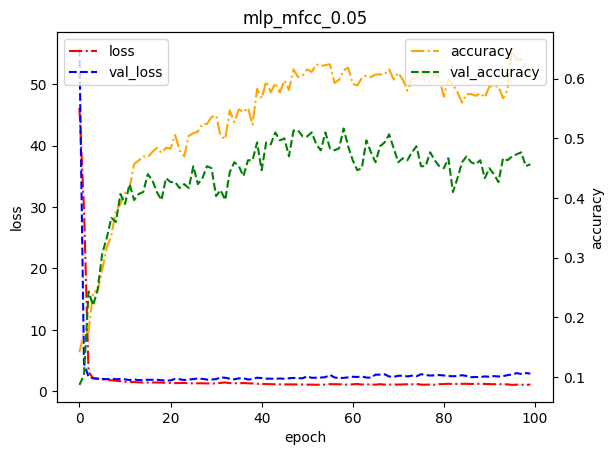

./dataset_city_voice\history\mlp_mfcc_0.0005.csv


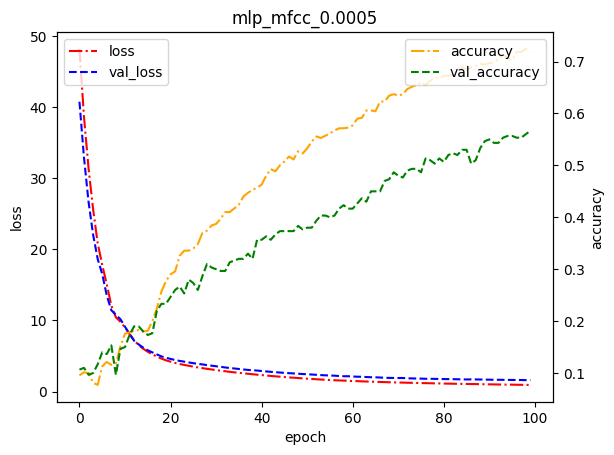

x.shape -> (1000, 12) y.shape -> (1000, 10)
./dataset_city_voice\history\mlp_chroma_0.05.csv


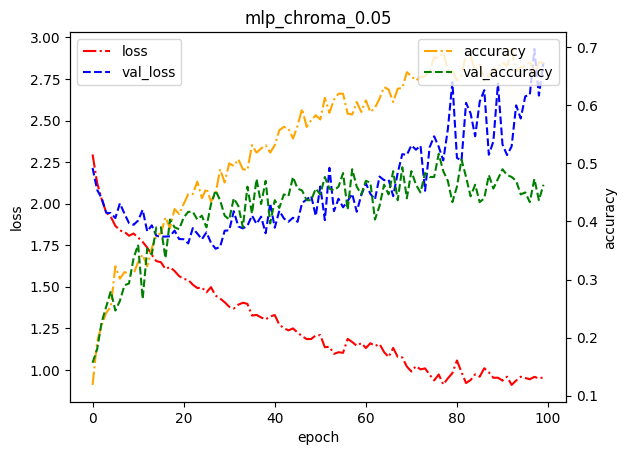

./dataset_city_voice\history\mlp_chroma_0.0005.csv


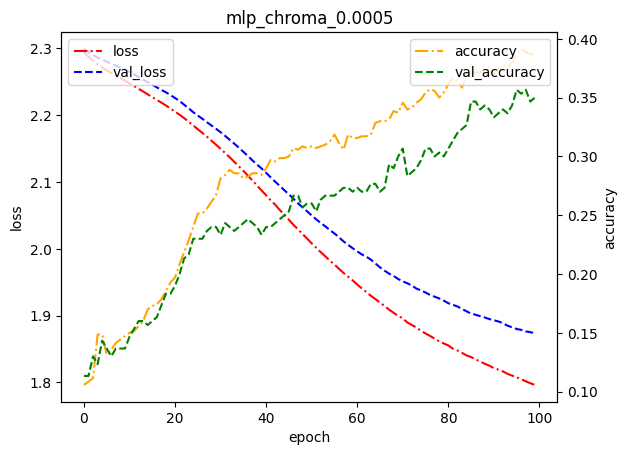

x.shape -> (1000, 40) y.shape -> (1000, 10)
./dataset_city_voice\history\mlp_features_0.05.csv


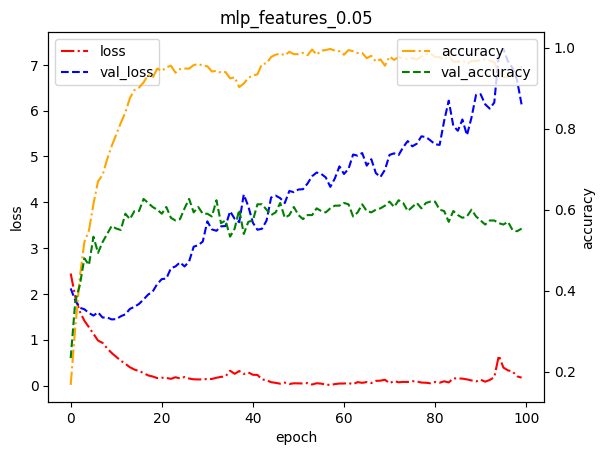

./dataset_city_voice\history\mlp_features_0.0005.csv


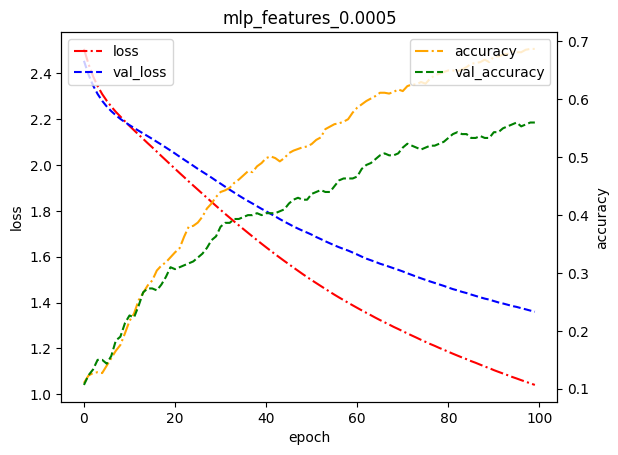

耗时：51.0625


In [13]:
start = time.process_time()
train(src_dir, feature='mfcc', model='mlp')
train(src_dir, feature='chroma', model='mlp')
train(src_dir, feature='features', model='mlp')
print(f'耗时：{time.process_time()-start}')

### LSTM

x.shape -> (1000, 173, 40) y.shape -> (1000, 10)
./dataset_city_voice\history\lstm_mfcc_0.05.csv


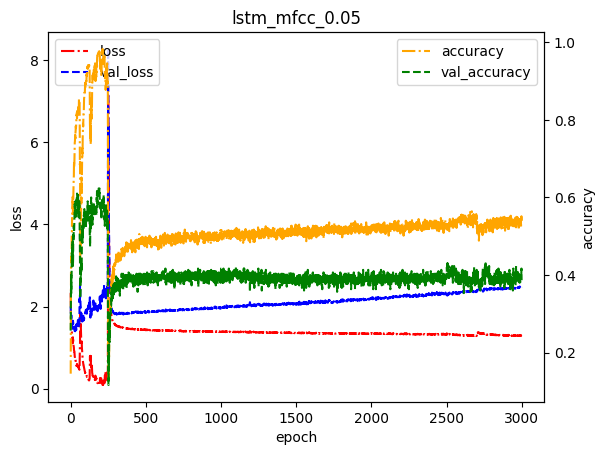

./dataset_city_voice\history\lstm_mfcc_0.0005.csv


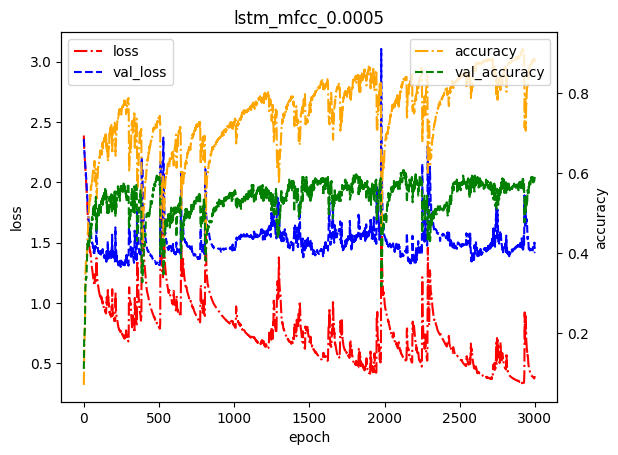

耗时：537.796875
x.shape -> (1000, 173, 12) y.shape -> (1000, 10)
./dataset_city_voice\history\lstm_chroma_0.05.csv


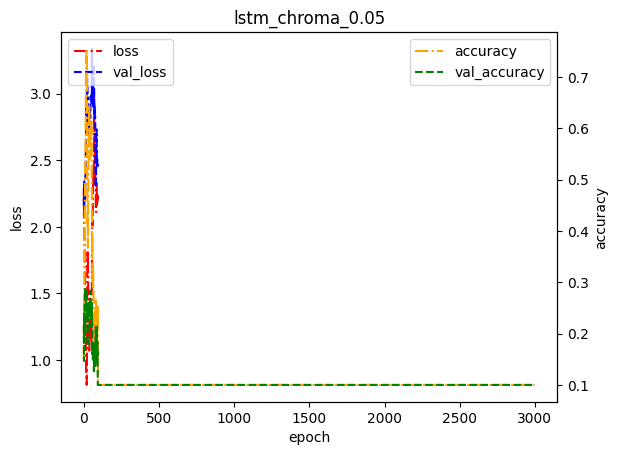

./dataset_city_voice\history\lstm_chroma_0.0005.csv


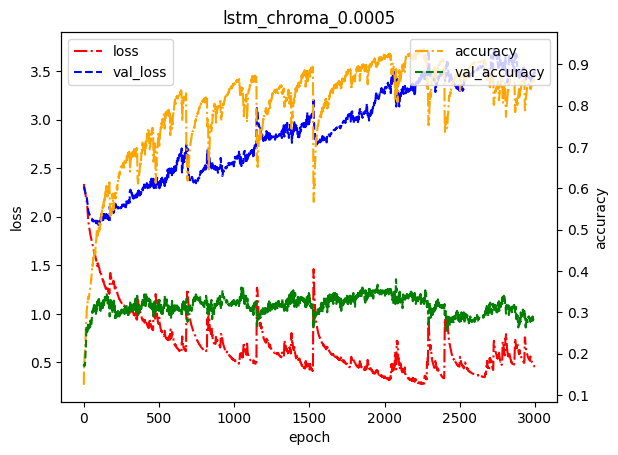

耗时：448.53125


In [14]:
start = time.process_time()
train(src_dir, feature='mfcc', model='lstm')
print(f'耗时：{time.process_time()-start}')

start = time.process_time()
train(src_dir, feature='chroma', model='lstm')
print(f'耗时：{time.process_time()-start}')

### GRU

x.shape -> (1000, 173, 40) y.shape -> (1000, 10)
./dataset_city_voice\history\gru_mfcc_0.05.csv


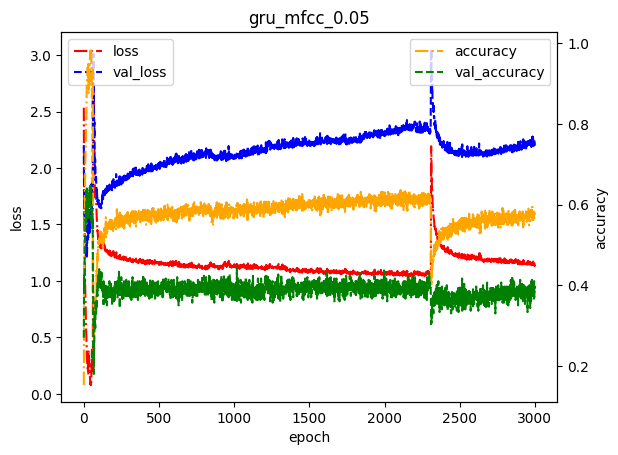

./dataset_city_voice\history\gru_mfcc_0.0005.csv


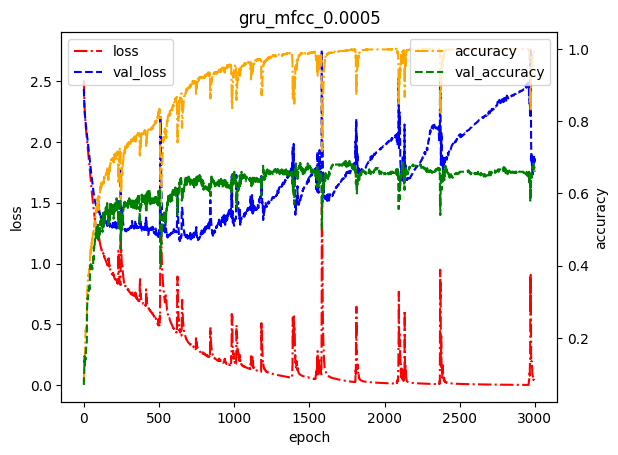

耗时：521.828125
x.shape -> (1000, 173, 12) y.shape -> (1000, 10)
./dataset_city_voice\history\gru_chroma_0.05.csv


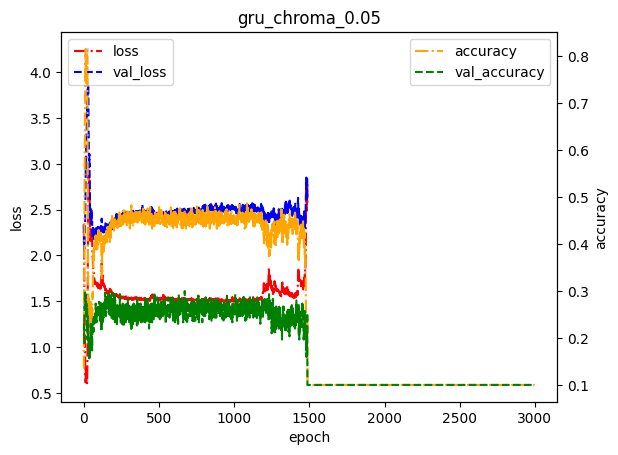

./dataset_city_voice\history\gru_chroma_0.0005.csv


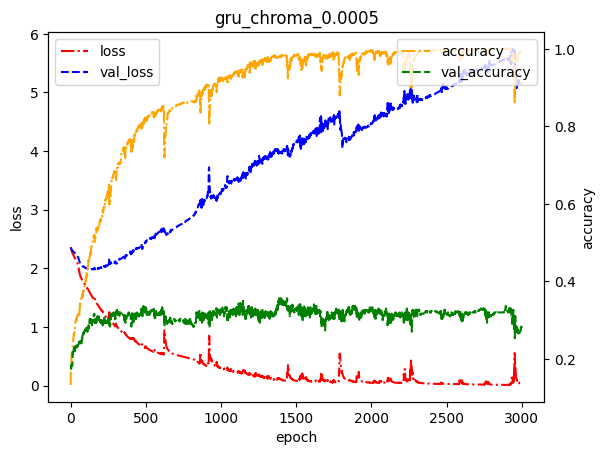

耗时：447.78125


In [15]:
start = time.process_time()
train(src_dir, feature='mfcc', model='gru')
print(f'耗时：{time.process_time()-start}')

start = time.process_time()
train(src_dir, feature='chroma', model='gru')
print(f'耗时：{time.process_time()-start}')

### CNN

x.shape -> (1000, 40, 173, 1) y.shape -> (1000, 10)
./dataset_city_voice\history\cnn_mfcc_0.05.csv


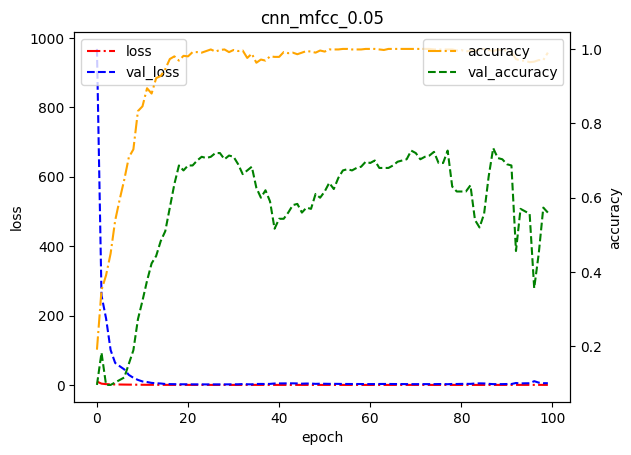

./dataset_city_voice\history\cnn_mfcc_0.0005.csv


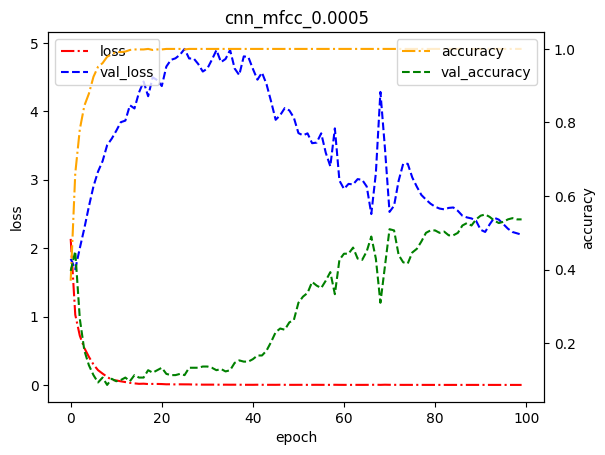

耗时：80.890625
x.shape -> (1000, 12, 173, 1) y.shape -> (1000, 10)
./dataset_city_voice\history\cnn_chroma_0.05.csv


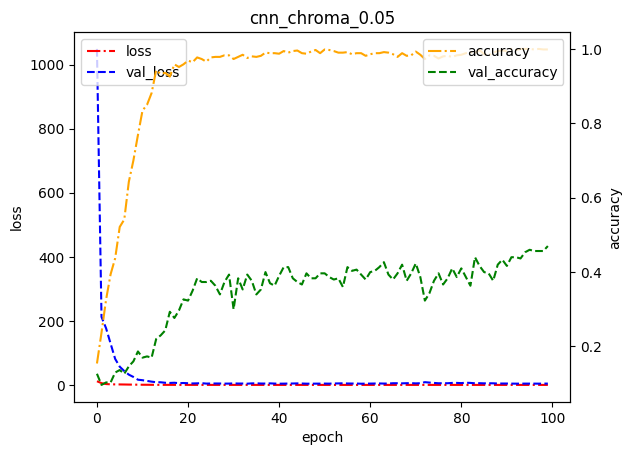

./dataset_city_voice\history\cnn_chroma_0.0005.csv


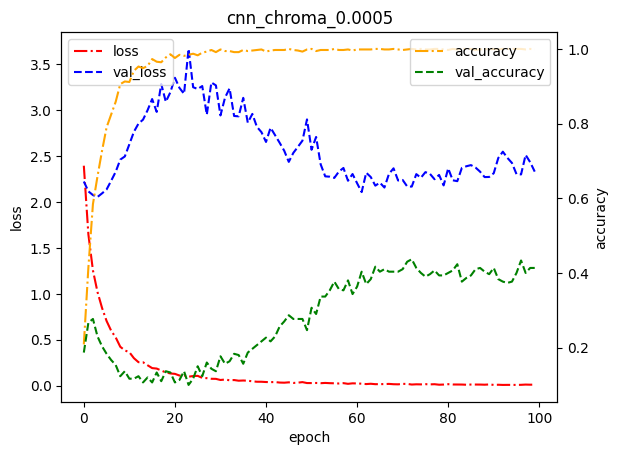

耗时：29.375


In [16]:
start = time.process_time()
train(src_dir, feature='mfcc', model='cnn')
print(f'耗时：{time.process_time()-start}')

start = time.process_time()
train(src_dir, feature='chroma', model='cnn')
print(f'耗时：{time.process_time()-start}')